In [1]:
import MDAnalysis as mda
import numpy as np
import MDAnalysis.analysis.distances
import matplotlib.pyplot as plt
from numpy import linalg as LA
import MDAnalysis.analysis.rdf as rdf_calc
import seaborn as sns
import pandas as pd
from tqdm.auto import tqdm

# W34A_2970

In [2]:
u = mda.Universe("/Users/k20098771/Data/2024/CGtoAA/Startpoint/W34A_300us_297_0us/step6_6.gro", "/Users/k20098771/Data/2024/CGtoAA/Startpoint/W34A_300us_297_0us/step7_centered.xtc")
protein = u.select_atoms('protein')
print('There are {} residues in the protein'.format(len(protein.residues)))
#protein residues

There are 112 residues in the protein


In [3]:
#Trajectory frames
u_1000 = u.trajectory[::100]
len(u_1000)
time=[]
for ts in tqdm(u_1000):
    time.append(u.trajectory.time)
time=np.array(time)
len(time)

  0%|          | 0/61 [00:00<?, ?it/s]

61

In [4]:
#Select DAP12 and TREM2
DAP12_A = u.select_atoms('index 0:495 and name CA') #DAP12 chain A
DAP12_B = u.select_atoms('index 496:991 and name CA') #DAP12 chain B
TREM2 = u.select_atoms('index 992:1704 and name CA') #TREM2
print(np.unique(DAP12_A.resids))
print(np.unique(DAP12_B.resids))
print(np.unique(TREM2.resids))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]


In [5]:
# Create empty contact map
contact_map = np.zeros((len(TREM2.residues), len(DAP12_A.residues)), dtype=int)

for i, ts in enumerate(tqdm(u_1000)):
    # Create a temporary contact map for each time step
    temp_contact_map = np.zeros((len(TREM2.residues), len(DAP12_A.residues)), dtype=int)
    
    for j, trem_residue in enumerate(TREM2.residues):
        for k, dap_residue in enumerate(DAP12_A.residues):
            # Check if any pair of atoms between TREM2[j] and DAP12_A[k] is in contact
            contact_exists = any(
                MDAnalysis.analysis.distances.distance_array(
                    trem_atom.position,
                    dap_atom.position,
                    box=u.dimensions,
                ).min() < 3
                for trem_atom in trem_residue.atoms
                for dap_atom in dap_residue.atoms
            )
            # Increment the contact count if contact exists
            temp_contact_map[j, k] = int(contact_exists)
    
    # Add the temporary contact map to the cumulative contact map
    contact_map += temp_contact_map

# Now, 'contact_map' contains cumulative contact numbers between TREM2 and DAP12_A residues over multiple time steps.


  0%|          | 0/61 [00:00<?, ?it/s]

In [6]:
contact_map

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
contact_map_01 = contact_map
np.save('W34A_contact_map_01.npy', contact_map_01)
np.savetxt('/Users/k20098771/Data/Figures/W34A_contact_map_01.npy', contact_map_01, fmt='%d')
print("Saved contact_map as K26A_contact_map_01.npy")

Saved contact_map as K26A_contact_map_01.npy


In [8]:
# Create empty contact map
contact_map_B = np.zeros((len(TREM2.residues), len(DAP12_B.residues)), dtype=int)

for i, ts in enumerate(tqdm(u_1000)):
    # Create a temporary contact map for each time step
    temp_contact_map = np.zeros((len(TREM2.residues), len(DAP12_B.residues)), dtype=int)
    
    for j, trem_residue in enumerate(TREM2.residues):
        for k, dap_residue in enumerate(DAP12_B.residues):
            # Check if any pair of atoms between TREM2[j] and DAP12_B[k] is in contact
            contact_exists = any(
                MDAnalysis.analysis.distances.distance_array(
                    trem_atom.position,
                    dap_atom.position,
                    box=u.dimensions,
                ).min() < 3
                for trem_atom in trem_residue.atoms
                for dap_atom in dap_residue.atoms
            )
            # Increment the contact count if contact exists
            temp_contact_map[j, k] = int(contact_exists)
    
    # Add the temporary contact map to the cumulative contact map
    contact_map_B += temp_contact_map

# Now, 'contact_map' contains cumulative contact numbers between TREM2 and DAP12_A residues over multiple time steps.


  0%|          | 0/61 [00:00<?, ?it/s]

In [9]:
contact_map_B

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1]])

In [10]:
contact_map_02 = contact_map_B
np.save('W34A_contact_map_02.npy', contact_map_02)
np.savetxt('/Users/k20098771/Data/Figures/W34A_contact_map_02.npy', contact_map_02, fmt='%d')
print("Saved contact_map as K26A_contact_map_02.npy")

Saved contact_map as K26A_contact_map_02.npy


# W34A_2990

In [11]:
u = mda.Universe("/Users/k20098771/Data/2024/CGtoAA/Startpoint/W34A_300us_299_0us/step6_6.gro", "/Users/k20098771/Data/2024/CGtoAA/Startpoint/W34A_300us_299_0us/step7_centered.xtc")
protein = u.select_atoms('protein')
print('There are {} residues in the protein'.format(len(protein.residues)))
#protein residues

There are 112 residues in the protein


In [12]:
#Trajectory frames
u_1000 = u.trajectory[::100]
len(u_1000)
time=[]
for ts in tqdm(u_1000):
    time.append(u.trajectory.time)
time=np.array(time)
len(time)

  0%|          | 0/61 [00:00<?, ?it/s]

61

In [13]:
#Select DAP12 and TREM2
DAP12_A = u.select_atoms('index 0:495 and name CA') #DAP12 chain A
DAP12_B = u.select_atoms('index 496:991 and name CA') #DAP12 chain B
TREM2 = u.select_atoms('index 992:1704 and name CA') #TREM2
print(np.unique(DAP12_A.resids))
print(np.unique(DAP12_B.resids))
print(np.unique(TREM2.resids))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]


In [14]:
# Create empty contact map
contact_map = np.zeros((len(TREM2.residues), len(DAP12_A.residues)), dtype=int)

for i, ts in enumerate(tqdm(u_1000)):
    # Create a temporary contact map for each time step
    temp_contact_map = np.zeros((len(TREM2.residues), len(DAP12_A.residues)), dtype=int)
    
    for j, trem_residue in enumerate(TREM2.residues):
        for k, dap_residue in enumerate(DAP12_A.residues):
            # Check if any pair of atoms between TREM2[j] and DAP12_A[k] is in contact
            contact_exists = any(
                MDAnalysis.analysis.distances.distance_array(
                    trem_atom.position,
                    dap_atom.position,
                    box=u.dimensions,
                ).min() < 3
                for trem_atom in trem_residue.atoms
                for dap_atom in dap_residue.atoms
            )
            # Increment the contact count if contact exists
            temp_contact_map[j, k] = int(contact_exists)
    
    # Add the temporary contact map to the cumulative contact map
    contact_map += temp_contact_map

# Now, 'contact_map' contains cumulative contact numbers between TREM2 and DAP12_A residues over multiple time steps.


  0%|          | 0/61 [00:00<?, ?it/s]

In [15]:
contact_map

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [16]:
contact_map_03 = contact_map
np.save('W34A_contact_map_03.npy', contact_map_03)
np.savetxt('/Users/k20098771/Data/Figures/W34A_contact_map_03.npy', contact_map_03, fmt='%d')
print("Saved contact_map as K26A_contact_map_03.npy")

Saved contact_map as K26A_contact_map_03.npy


In [17]:
# Create empty contact map
contact_map_B = np.zeros((len(TREM2.residues), len(DAP12_B.residues)), dtype=int)

for i, ts in enumerate(tqdm(u_1000)):
    # Create a temporary contact map for each time step
    temp_contact_map = np.zeros((len(TREM2.residues), len(DAP12_B.residues)), dtype=int)
    
    for j, trem_residue in enumerate(TREM2.residues):
        for k, dap_residue in enumerate(DAP12_B.residues):
            # Check if any pair of atoms between TREM2[j] and DAP12_B[k] is in contact
            contact_exists = any(
                MDAnalysis.analysis.distances.distance_array(
                    trem_atom.position,
                    dap_atom.position,
                    box=u.dimensions,
                ).min() < 3
                for trem_atom in trem_residue.atoms
                for dap_atom in dap_residue.atoms
            )
            # Increment the contact count if contact exists
            temp_contact_map[j, k] = int(contact_exists)
    
    # Add the temporary contact map to the cumulative contact map
    contact_map_B += temp_contact_map

# Now, 'contact_map' contains cumulative contact numbers between TREM2 and DAP12_A residues over multiple time steps.


  0%|          | 0/61 [00:00<?, ?it/s]

In [18]:
contact_map_B

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [19]:
contact_map_04 = contact_map_B
np.save('W34A_contact_map_04.npy', contact_map_04)
np.savetxt('/Users/k20098771/Data/Figures/W34A_contact_map_04.npy', contact_map_04, fmt='%d')
print("Saved contact_map as K26A_contact_map_04.npy")

Saved contact_map as K26A_contact_map_04.npy


# W34A_3000

In [20]:
u = mda.Universe("/Users/k20098771/Data/2024/CGtoAA/Startpoint/W34A_300us_300_0us/step6_6.gro", "/Users/k20098771/Data/2024/CGtoAA/Startpoint/W34A_300us_300_0us/step7_centered.xtc")
protein = u.select_atoms('protein')
print('There are {} residues in the protein'.format(len(protein.residues)))
#protein residues

There are 112 residues in the protein


In [21]:
#Trajectory frames
u_1000 = u.trajectory[::100]
len(u_1000)
time=[]
for ts in tqdm(u_1000):
    time.append(u.trajectory.time)
time=np.array(time)
len(time)

  0%|          | 0/61 [00:00<?, ?it/s]

61

In [22]:
#Select DAP12 and TREM2
DAP12_A = u.select_atoms('index 0:495 and name CA') #DAP12 chain A
DAP12_B = u.select_atoms('index 496:991 and name CA') #DAP12 chain B
TREM2 = u.select_atoms('index 992:1704 and name CA') #TREM2
print(np.unique(DAP12_A.resids))
print(np.unique(DAP12_B.resids))
print(np.unique(TREM2.resids))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]


In [23]:
# Create empty contact map
contact_map = np.zeros((len(TREM2.residues), len(DAP12_A.residues)), dtype=int)

for i, ts in enumerate(tqdm(u_1000)):
    # Create a temporary contact map for each time step
    temp_contact_map = np.zeros((len(TREM2.residues), len(DAP12_A.residues)), dtype=int)
    
    for j, trem_residue in enumerate(TREM2.residues):
        for k, dap_residue in enumerate(DAP12_A.residues):
            # Check if any pair of atoms between TREM2[j] and DAP12_A[k] is in contact
            contact_exists = any(
                MDAnalysis.analysis.distances.distance_array(
                    trem_atom.position,
                    dap_atom.position,
                    box=u.dimensions,
                ).min() < 3
                for trem_atom in trem_residue.atoms
                for dap_atom in dap_residue.atoms
            )
            # Increment the contact count if contact exists
            temp_contact_map[j, k] = int(contact_exists)
    
    # Add the temporary contact map to the cumulative contact map
    contact_map += temp_contact_map

# Now, 'contact_map' contains cumulative contact numbers between TREM2 and DAP12_A residues over multiple time steps.


  0%|          | 0/61 [00:00<?, ?it/s]

In [24]:
contact_map

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 5, 0]])

In [25]:
contact_map_05 = contact_map
np.save('W34A_contact_map_05.npy', contact_map_05)
np.savetxt('/Users/k20098771/Data/Figures/W34A_contact_map_05.npy', contact_map_05, fmt='%d')
print("Saved contact_map as K26A_contact_map_05.npy")

Saved contact_map as K26A_contact_map_05.npy


In [26]:
# Create empty contact map
contact_map_B = np.zeros((len(TREM2.residues), len(DAP12_B.residues)), dtype=int)

for i, ts in enumerate(tqdm(u_1000)):
    # Create a temporary contact map for each time step
    temp_contact_map = np.zeros((len(TREM2.residues), len(DAP12_B.residues)), dtype=int)
    
    for j, trem_residue in enumerate(TREM2.residues):
        for k, dap_residue in enumerate(DAP12_B.residues):
            # Check if any pair of atoms between TREM2[j] and DAP12_B[k] is in contact
            contact_exists = any(
                MDAnalysis.analysis.distances.distance_array(
                    trem_atom.position,
                    dap_atom.position,
                    box=u.dimensions,
                ).min() < 3
                for trem_atom in trem_residue.atoms
                for dap_atom in dap_residue.atoms
            )
            # Increment the contact count if contact exists
            temp_contact_map[j, k] = int(contact_exists)
    
    # Add the temporary contact map to the cumulative contact map
    contact_map_B += temp_contact_map

# Now, 'contact_map' contains cumulative contact numbers between TREM2 and DAP12_A residues over multiple time steps.


  0%|          | 0/61 [00:00<?, ?it/s]

In [27]:
contact_map_B

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 6, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 3, 0]])

In [28]:
contact_map_06 = contact_map_B
np.save('W34A_contact_map_06.npy', contact_map_06)
np.savetxt('/Users/k20098771/Data/Figures/W34A_contact_map_06.npy', contact_map_04, fmt='%d')
print("Saved contact_map as K26A_contact_map_06.npy")

Saved contact_map as K26A_contact_map_06.npy


# Mix all

In [29]:
# Load all six contact maps
contact_maps = [np.load(f'W34A_contact_map_0{i}.npy') for i in range(1, 7)]

# Sum them element-wise to get the merged contact map
merged_contact_map = np.sum(contact_maps, axis=0)

# Save the merged contact map
np.save('W34A_merged_contact_map.npy', merged_contact_map)

np.savetxt('/Users/k20098771/Data/Figures/W34A_contact_map_merged.npy', merged_contact_map, fmt='%d')
print("Saved contact_map as K26X_contact_map_merged.npy")

# Optionally, print the shape to verify
print("Merged contact map shape:", merged_contact_map.shape)

print(merged_contact_map)

Saved contact_map as K26X_contact_map_merged.npy
Merged contact map shape: (46, 33)
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  1 10  1]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  2 10  1]]


In [30]:
prob=merged_contact_map/(len(u_1000)*3)
chart=np.where(prob>=0.6)

In [31]:
df = pd.DataFrame(chart)
index=["TREM2", "DAP12_B"]
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,9,22,25,26,26,29,29,29,30,30,32,32,33,33,33,36,37,37,37
1,7,18,15,18,22,19,22,23,22,26,22,26,23,26,27,26,27,30,31


In [32]:
df = pd.DataFrame({'TREM2': chart[0]+161})
df['DAP12'] = chart[1]+35 # Add a column 'D' with values from chartA[1]
df.index = range(1, len(df) + 1)
print(df)

    TREM2  DAP12
1     170     42
2     183     53
3     186     50
4     187     53
5     187     57
6     190     54
7     190     57
8     190     58
9     191     57
10    191     61
11    193     57
12    193     61
13    194     58
14    194     61
15    194     62
16    197     61
17    198     62
18    198     65
19    198     66


In [33]:
# Save as CSV
df.to_csv("/Users/k20098771/Data/Figures/W34A_contacts_60_percentage.csv", index=False)

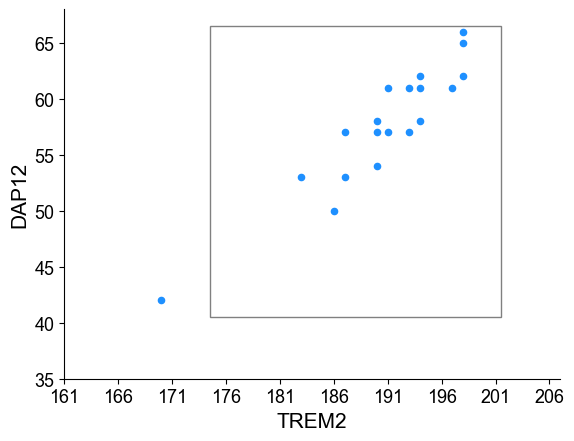

In [34]:
import matplotlib.patches as patches

df = pd.DataFrame({'TREM2': chart[0]+161})
df['DAP12'] = chart[1]+35

# Plotting the DataFrame
ax = df.plot(x='TREM2', y='DAP12', kind='scatter', color='dodgerblue')
ax.set_xlabel('TREM2', fontsize=15, fontname='Arial')
ax.set_ylabel('DAP12', fontsize=15, fontname='Arial')

# Add the rectangle
#rect = patches.Rectangle((25.5, 16.5), width=1, height=5, fill=False, edgecolor='red') #DxxxT
#ax.add_patch(rect)

rect_2 = patches.Rectangle((13.5+161, 5.5+35), width=27, height=26, fill=False, edgecolor='gray')
ax.add_patch(rect_2)

# Adjusting the x-axis ticks
x_ticks = np.arange(161, 46+161, 5)
y_ticks = np.arange(35, 33+35, 5)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
plt.xlim([0+161,46+161])
plt.ylim([0+35,33+35])

# Changing the font name of x-axis and y-axis tick labels
ax.set_xticklabels(ax.get_xticks(), fontsize=13, fontname='Arial')
ax.set_yticklabels(ax.get_yticks(), fontsize=13, fontname='Arial')

ax=plt.gca() ##get caurrent axis
ax.spines["right"].set_color("none") #visible for right spines
ax.spines["top"].set_color("none") ##visible for top spines

#Saving the plot as an image file
plt.savefig("/Users/k20098771/Data/Figures/W34A_contact_map_merged_60.eps", dpi=800, format='eps',bbox_inches="tight")
